# Toy example - Meta gradients

## Meta gradients


Meta Loss 12073.1376953125 Loss 0.005434602964669466
Meta Loss 12020.162109375 Loss 0.4368094503879547
Meta Loss 11599.2421875 Loss 11.654024124145508
Meta Loss 10617.486328125 Loss 69.73291778564453
Meta Loss 8995.1318359375 Loss 262.45367431640625
Meta Loss 7390.24072265625 Loss 696.0130615234375
Meta Loss 6008.57666015625 Loss 1184.744140625
Meta Loss 5350.9296875 Loss 1460.0189208984375
Meta Loss 4738.216796875 Loss 1685.089111328125
Meta Loss 4325.08984375 Loss 1929.2513427734375
Meta Loss 4250.33203125 Loss 1947.58837890625
Meta Loss 4164.560546875 Loss 2015.72021484375
Meta Loss 4337.8876953125 Loss 1907.7996826171875
Meta Loss 4194.984375 Loss 2063.123291015625
Meta Loss 4125.20361328125 Loss 2068.65087890625
Meta Loss 4220.0068359375 Loss 1988.610595703125
Meta Loss 4101.63623046875 Loss 2059.738525390625
Meta Loss 4152.7373046875 Loss 1829.7908935546875
Meta Loss 4055.7265625 Loss 2030.15283203125
Meta Loss 4109.1318359375 Loss 2009.271240234375
Meta Loss 4073.20166015625 Los

Meta Loss 68.6717758178711 Loss 47.99649429321289
Meta Loss 39.23101806640625 Loss 34.26254653930664
Meta Loss 51.3146858215332 Loss 24.411319732666016
Meta Loss 43.85151290893555 Loss 19.509910583496094
Meta Loss 38.081825256347656 Loss 33.54296875
Meta Loss 49.75093460083008 Loss 23.67327880859375
Meta Loss 34.08256149291992 Loss 35.605445861816406
Meta Loss 38.83134460449219 Loss 26.469274520874023
Meta Loss 27.944753646850586 Loss 23.358020782470703
Meta Loss 35.185813903808594 Loss 21.00356674194336
Meta Loss 40.27446746826172 Loss 22.941421508789062
Meta Loss 27.674182891845703 Loss 22.98822021484375
Meta Loss 33.872779846191406 Loss 17.562217712402344
Meta Loss 26.1082820892334 Loss 21.45450210571289
Meta Loss 23.125743865966797 Loss 17.066675186157227
Meta Loss 44.891719818115234 Loss 24.066194534301758
Meta Loss 27.14715003967285 Loss 17.27440643310547
Meta Loss 27.36972427368164 Loss 11.19344711303711
Meta Loss 35.15739059448242 Loss 24.89283561706543
Meta Loss 22.96146774291

Text(0.5, 1.0, 'Meta Loss')

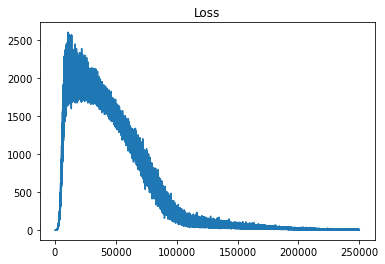

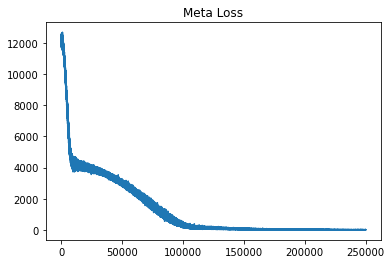

In [11]:
"""
when computing the loss, we will randomly add the term - meta_parameter * torch.rand(1)

The initial value for the meta_parameter is -100 but we make it a trainable parmeter.

The meta gradient should learn that in order to keep decreasing the loss function,
meta_parameter should be 0.0.3 
"""

# Imports
import random
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt


def get_targets(x):
    """Random function to learn."""
    return (10 + x ** 2).sum(axis=-1)

# Theta
model = nn.Sequential(
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 1))

# Eta
meta_model = nn.Sequential(
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 1))

#meta_parameter = torch.tensor(data=[-100], dtype=torch.float32, requires_grad=True)

criterion = nn.MSELoss(reduction='none')
meta_opt = optim.Adam(meta_model.parameters(), lr=1e-5)
opt  = optim.Adam(model.parameters(), lr=1e-4)
loss_data = []
meta_loss_data = []

for e in range(250000):
    
    # Get data
    x = torch.randn(32, 10)
    
    # Get Targets
    y = get_targets(x)
  
    # Predict targets with model - forward pass
    output = model(x)
    
    # Compute loss
    loss = criterion(output.squeeze(1), meta_model(x).squeeze(1)).mean()
    loss_data.append(loss.item())

    # Backward pass
    loss.backward()
    opt.step() # theta' = theta + f(weights)
    #for param in model.parameters():
    #    param.data.sub_(1e-3 * param.grad.data)

    # Meta forward pass
    output = model(x) # y = model(theta', x)

    # Meta loss - which loss is correct here? should this one as only accounts for normal loss
    meta_loss = criterion(output.squeeze(1), y).mean()
    meta_loss_data.append(meta_loss.item())
    
    if e % 1000 == 0:
        print("Meta Loss", meta_loss.item(), "Loss", loss.item())

    # Meta backward pass  
    meta_loss.backward()
    #if e % 1000 == 0:
    #    print([par.grad for par in meta_model.parameters()])
    meta_opt.step()
    #meta_paramater_data.append(meta_parameter.item())
    
    # Clearn grads from previous iteration in both optimizers
    if e % 6 == 0:
        opt.zero_grad()
        meta_opt.zero_grad()

  
# Plot loss
plt.figure()
plt.plot(loss_data)
plt.title("Loss")

plt.figure()
plt.plot(meta_loss_data)
plt.title("Meta Loss")